載入套件

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import MDS
import numpy as np
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import hdbscan
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np

載入資料，並將像似矩陣轉為距離矩陣

In [5]:

# D = pd.read_csv("../R-scripts/correlation_matrix.csv", index_col=0)

D = pd.read_csv("../R-scripts/combined_matrix_symbols.csv", index_col=0)



def replace_with_one_minus_x(x):
    return 1 - x

D = D.fillna(0)
D_transformed = D.applymap(replace_with_one_minus_x)


進行HDBSCAN 聚類，為後續可視化資料進行MDS降維，儲存聚類特徵分類檔

In [6]:
# 使用 HDBSCAN 进行聚类
clustering = hdbscan.HDBSCAN(min_samples=5, metric='precomputed').fit(D_transformed)
# print(clustering.labels_)

D_array = D_transformed.values

pca = PCA(n_components=2, random_state=42)
D_2d = pca.fit_transform(D_array)
hdbscan_cluster_pca = hdbscan.HDBSCAN(min_cluster_size=20, min_samples=5)
hdbscan_labels_pca = hdbscan_cluster_pca.fit_predict(D_2d)
print(hdbscan_labels_pca)

tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(D)
hdbscan_cluster_tsne = hdbscan.HDBSCAN(min_cluster_size=20, min_samples=5)
hdbscan_labels_tsne = hdbscan_cluster_tsne.fit_predict(X_2d)
print(hdbscan_labels_tsne)

mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
M_2d = mds.fit_transform(D_array)
hdbscan_cluster_mds= hdbscan.HDBSCAN(min_cluster_size=20, min_samples=5)
hdbscan_labels_mds = hdbscan_cluster_mds.fit_predict(M_2d)
print(hdbscan_labels_mds)


# 將特徵和分组结果组合成 DataFrame
result_df_dis = pd.DataFrame({'Feature': D.index.values, 'Cluster': clustering.labels_})

result_df_tsne = pd.DataFrame({'Feature': D.index.values, 'Cluster': hdbscan_cluster_tsne.labels_})

result_df_pca = pd.DataFrame({'Feature': D.index.values, 'Cluster': hdbscan_cluster_pca.labels_})

result_df_dis.to_csv("../result/hdbscan_group_dis.csv", index=False)

result_df_tsne.to_csv("../result/hdbscan_group_tsne.csv", index=False)

result_df_pca.to_csv("../result/hdbscan_group_pca.csv", index=False)


[ 2  1  2  2  2  2  2  1  1  2  2  2  1  2  0  2  2  0  2  2  2  1  2  2
  1  2  2 -1  2  2  2  2  2  2  2  1  2  2  2  2  2 -1  2  2  2  2  2  2
  2  2  2  2  2  2  1  2  2  1  2  2  2  2  2  2  2  2  2  2  2  1  0  2
  2  2  2 -1 -1  0  2  1 -1  2  2  2  2  2  2  2  2  2  2  2  0  2  2  2
  0  2  2  0  0  2  2 -1  2 -1  2  2  2 -1  2  2  2  0  2  2  2  2  0  0
  0  0  0  2  2  2  2  1 -1  2  0  1  0  2  2  1  2  2  2  2  1  2  2  0
  0  0  0  0  0  0  0  0  1  2  2  2  2  2  0  0  2  1  2  2  2  1  2  2
  2  2 -1  2  2  0  0  0  2  2  2  2  2  2  2  2  2  2  2  2  1  1 -1  2
  2  0  0  2 -1 -1  2  2  2  2  2  0  0  2  2  0  0  0  0  2  2  2  2  2
  0  0  0  2 -1  0 -1  0  0  2  0  0  0  0  0  0  2  2  2  1  2  2  2  0
  2 -1  0  2  0  0  2  1  2  2  2  0  0  2  2  1  2 -1  2 -1  2  2 -1  0
  2  1  2  2  2  2  0  2  2  2  2  2  0  2  2  2  2 -1  2  2  2  0  2  2
  0  0  0  2  2  2  2  2  2 -1  1  2  2 -1  2  0  0  0  1  2  1  1  1  2
 -1  2  0  0  0  0  2  2  2  2  2  2  2  2  2 -1  2

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


[ 1 -1  1  1  1  1  1 -1 -1  1  1  1 -1  1  0  1  1  0  1  1 -1 -1  1  1
 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1
  1  1 -1  1  1  1 -1 -1  1 -1  1  1  1  1  1  1  1 -1  1  1  1 -1  0  1
  1  1  1  1  1  0 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  0  1  1 -1
  0 -1  1  0  0  1  1  1  1  1  1  1  1 -1 -1 -1  1  0 -1  1 -1  1  0  0
  0  0  0  1  1 -1  1 -1  1 -1  0 -1  0  1  1 -1  1 -1  1  1 -1  1  1  0
  0  0  0  0  0  0  0  0 -1  1  1  1  1  1  0  0  1 -1 -1  1  1 -1  1  1
  1 -1  1  1  1  0  0  0 -1  1  1  1  1 -1  1  1  1  1  1  1 -1 -1 -1  1
 -1  0  0  1 -1 -1  1  1  1  1  1  0  0  1  1  0  0  0  0 -1  1  1  1  1
  0  0  0 -1  1  0  1  0  0  1  0  0  0  0  0  0  1 -1  1 -1  1  1  1  0
 -1  1  0  1  0  0  1 -1  1  1 -1  0  0  1  1 -1  1 -1 -1 -1  1 -1  1  0
  1 -1  1  1  1 -1 -1  1  1 -1 -1 -1  0  1  1  1  1  1 -1  1  1  0  1  1
  0  0 -1  1  1  1  1  1  1  1 -1  1  1  1  1  0  0  0 -1 -1 -1 -1 -1  1
  1 -1  0  0  0  0  1  1  1  1  1  1  1  1  1  1 -1

計算SC、DBI、CH 之不同指標分數，並輸出於終端機

In [7]:


print("==============distance data==================")


silhouette = silhouette_score(D_transformed, clustering.labels_, metric='precomputed')
print(f"Silhouette Coefficient: {silhouette},\n取值範圍在 [-1, 1] 之間。當 SC 接近 1 時，表示簇內樣本相似度高，簇間樣本相似度低，意味著同一簇內的樣本距離較近，不同簇的樣本相距較遠\n")

dbi = davies_bouldin_score(D_transformed, clustering.labels_)
print(f"Davies-Bouldin Index: {dbi},\n值最小为0，数值越小代表聚类效果越好,表示簇內的樣本越緊密，簇間的樣本越分散\n")

ch = calinski_harabasz_score(D_transformed, clustering.labels_)
print(f"Calinski-Harabasz Index: {ch},\n類別內部資料的協方差越小越好，類別之間的協方差越大越好，這樣的 Calinski-Harabasz 分數會高。總結起來一句話：CH index 的數值越大越好")

print("===================tsne=======================")

silhouette = silhouette_score(D_transformed, hdbscan_cluster_tsne.labels_, metric='precomputed')
print(f"Silhouette Coefficient: {silhouette},\n取值範圍在 [-1, 1] 之間。當 SC 接近 1 時，表示簇內樣本相似度高，簇間樣本相似度低，意味著同一簇內的樣本距離較近，不同簇的樣本相距較遠\n")

dbi = davies_bouldin_score(D_transformed, hdbscan_cluster_tsne.labels_)
print(f"Davies-Bouldin Index: {dbi},\n值最小为0，数值越小代表聚类效果越好,表示簇內的樣本越緊密，簇間的樣本越分散\n")

ch = calinski_harabasz_score(D_transformed, hdbscan_cluster_tsne.labels_)
print(f"Calinski-Harabasz Index: {ch},\n類別內部資料的協方差越小越好，類別之間的協方差越大越好，這樣的 Calinski-Harabasz 分數會高。總結起來一句話：CH index 的數值越大越好")


print("====================pca=======================")

silhouette = silhouette_score(D_transformed, hdbscan_cluster_pca.labels_, metric='precomputed')
print(f"Silhouette Coefficient: {silhouette},\n取值範圍在 [-1, 1] 之間。當 SC 接近 1 時，表示簇內樣本相似度高，簇間樣本相似度低，意味著同一簇內的樣本距離較近，不同簇的樣本相距較遠\n")

dbi = davies_bouldin_score(D_transformed, hdbscan_cluster_pca.labels_)
print(f"Davies-Bouldin Index: {dbi},\n值最小为0，数值越小代表聚类效果越好,表示簇內的樣本越緊密，簇間的樣本越分散\n")

ch = calinski_harabasz_score(D_transformed, hdbscan_cluster_pca.labels_)
print(f"Calinski-Harabasz Index: {ch},\n類別內部資料的協方差越小越好，類別之間的協方差越大越好，這樣的 Calinski-Harabasz 分數會高。總結起來一句話：CH index 的數值越大越好")


print("====================mds=======================")

silhouette = silhouette_score(D_transformed, hdbscan_cluster_mds.labels_, metric='precomputed')
print(f"Silhouette Coefficient: {silhouette},\n取值範圍在 [-1, 1] 之間。當 SC 接近 1 時，表示簇內樣本相似度高，簇間樣本相似度低，意味著同一簇內的樣本距離較近，不同簇的樣本相距較遠\n")

dbi = davies_bouldin_score(D_transformed, hdbscan_cluster_mds.labels_)
print(f"Davies-Bouldin Index: {dbi},\n值最小为0，数值越小代表聚类效果越好,表示簇內的樣本越緊密，簇間的樣本越分散\n")

ch = calinski_harabasz_score(D_transformed, hdbscan_cluster_mds.labels_)
print(f"Calinski-Harabasz Index: {ch},\n類別內部資料的協方差越小越好，類別之間的協方差越大越好，這樣的 Calinski-Harabasz 分數會高。總結起來一句話：CH index 的數值越大越好")


print("==============================================")


==============distance data==================
Silhouette Coefficient: 0.10345616278174148,
取值範圍在 [-1, 1] 之間。當 SC 接近 1 時，表示簇內樣本相似度高，簇間樣本相似度低，意味著同一簇內的樣本距離較近，不同簇的樣本相距較遠

Davies-Bouldin Index: 2.260263545020006,
值最小为0，数值越小代表聚类效果越好,表示簇內的樣本越緊密，簇間的樣本越分散

Calinski-Harabasz Index: 55.9823579195043,
類別內部資料的協方差越小越好，類別之間的協方差越大越好，這樣的 Calinski-Harabasz 分數會高。總結起來一句話：CH index 的數值越大越好
===================tsne=======================
Silhouette Coefficient: -0.6620702791827601,
取值範圍在 [-1, 1] 之間。當 SC 接近 1 時，表示簇內樣本相似度高，簇間樣本相似度低，意味著同一簇內的樣本距離較近，不同簇的樣本相距較遠

Davies-Bouldin Index: 0.6883188798975326,
值最小为0，数值越小代表聚类效果越好,表示簇內的樣本越緊密，簇間的樣本越分散

Calinski-Harabasz Index: 148.20530186872023,
類別內部資料的協方差越小越好，類別之間的協方差越大越好，這樣的 Calinski-Harabasz 分數會高。總結起來一句話：CH index 的數值越大越好
====================pca=======================
Silhouette Coefficient: -0.24874422887588957,
取值範圍在 [-1, 1] 之間。當 SC 接近 1 時，表示簇內樣本相似度高，簇間樣本相似度低，意味著同一簇內的樣本距離較近，不同簇的樣本相距較遠

Davies-Bouldin Index: 1.178835417675287,
值最小为0，数值越小代表聚类效果越好,表示簇內的樣本越緊密，簇間的樣本越分散

Cali

產生可視化圖片

[[-0.98410493  1.1759307 ]
 [ 0.992002   -2.8205032 ]
 [ 4.2658267  11.129774  ]]


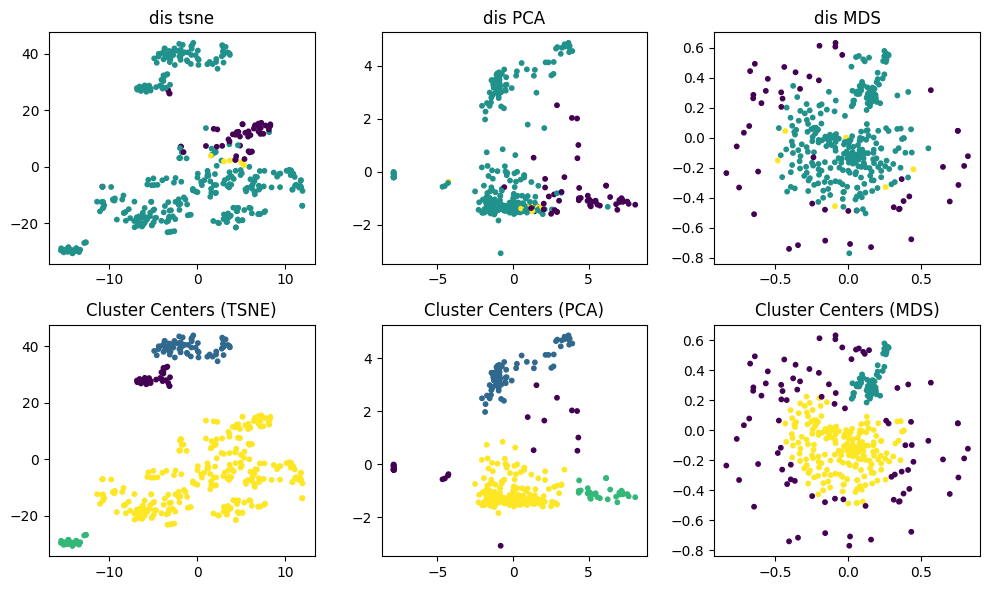

In [10]:
cluster_centers = []

fig, axs = plt.subplots(2, 3, figsize=(10, 6))

# 第一张子图：HDBSCAN 聚类结果

# 可视化聚类结果
axs[0, 0].scatter(X_2d[:, 0], X_2d[:, 1], c=clustering.labels_, cmap='viridis', s=10,)
axs[0, 0].set_title('dis tsne')
cluster_centers.append( np.array([np.mean(X_2d[clustering.labels_ == label], axis=0) for label in set(clustering.labels_)]))
# axs[0, 0].set_title('t-SNE Visualization of HDBSCAN Clustering')

# 第二张子图：原始数据的 pca 降维结果
axs[0, 1].scatter(D_2d[:, 0], D_2d[:, 1], c=clustering.labels_, s=10)
axs[0, 1].set_title('dis PCA')
cluster_centers.append( np.array([np.mean(D_2d[clustering.labels_ == label], axis=0) for label in set(clustering.labels_)]))

axs[0, 2].scatter(M_2d[:, 0], M_2d[:, 1], c=clustering.labels_, s=10)
axs[0, 2].set_title('dis MDS')
cluster_centers.append( np.array([np.mean(M_2d[clustering.labels_ == label], axis=0) for label in set(clustering.labels_)]))



# ax = axs[3, 2]
# clustering.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette(), axis=ax)


axs[1, 0].scatter(X_2d[:, 0], X_2d[:, 1], c=hdbscan_labels_tsne, s=10)
axs[1, 0].set_title('Cluster Centers (TSNE)')

cluster_centers.append(np.array([np.mean(X_2d[hdbscan_cluster_tsne.labels_ == label], axis=0) for label in set(hdbscan_cluster_tsne.labels_)]))


cluster_centers.append( np.array([np.mean(D_2d[hdbscan_cluster_pca.labels_ == label], axis=0) for label in set(hdbscan_cluster_pca.labels_)]))
axs[1, 1].scatter(D_2d[:, 0], D_2d[:, 1], c=hdbscan_labels_pca, s=10,)
axs[1, 1].set_title('Cluster Centers (PCA)')


cluster_centers.append(np.array([np.mean(X_2d[hdbscan_cluster_mds.labels_ == label], axis=0) for label in set(hdbscan_cluster_mds.labels_)]))

axs[1, 2].scatter(M_2d[:, 0], M_2d[:, 1], c=hdbscan_labels_mds, s=10)
axs[1, 2].set_title('Cluster Centers (MDS)')

plt.tight_layout()

# 显示画布
plt.show()


In [9]:
# 找到每個聚類的最具代表性基因

label_list = [clustering.labels_,clustering.labels_,clustering.labels_,hdbscan_labels_tsne,hdbscan_labels_pca,hdbscan_labels_mds]
s = ["dis tsne","dis pca","dis mds","tsne","pca","mds"]
i =0
ii = 0
for label_ in label_list:
   
    # print(label_)
    representative_genes = []
    clu = []
    for label, center in zip(set(label_), cluster_centers[ii]):
        clu.append(label)
        # print(label)
        genes = D.index.values
        # 計算每個基因到聚類中心的距離
        distances = np.linalg.norm(X_2d[label_ == label] - center, axis=1)
        
        # 找到最接近中心的基因索引
        closest_gene_index = np.argmin(distances)
        
        # 找到最具代表性基因
        closest_gene = genes[label_ == label][closest_gene_index]
        
        # 將最具代表性基因添加到列表
        representative_genes.append(closest_gene)

    # 打印結果
    print("Representative Genes for Each Cluster:",s[i])
    
    j = 0
    for gene in enumerate(representative_genes):
        print("Cluster",clu[j],gene)
        j+=1
    i+=1
    ii+=1


Representative Genes for Each Cluster: dis tsne
Cluster 0 (0, 'FMN2')
Cluster 1 (1, 'SFRP2')
Cluster -1 (2, 'PDE4C')
Representative Genes for Each Cluster: dis pca
Cluster 0 (0, 'MPPED2')
Cluster 1 (1, 'SFRP2')
Cluster -1 (2, 'AFAP1')
Representative Genes for Each Cluster: dis mds
Cluster 0 (0, 'MPPED2')
Cluster 1 (1, 'SFRP2')
Cluster -1 (2, 'AFAP1')
Representative Genes for Each Cluster: tsne
Cluster 0 (0, 'RARB')
Cluster 1 (1, 'HOXD10')
Cluster 2 (2, 'NTM')
Cluster 3 (3, 'CRYM')
Representative Genes for Each Cluster: pca
Cluster 0 (0, 'CREB3L2')
Cluster 1 (1, 'PLTP')
Cluster 2 (2, 'LOXL2')
Cluster -1 (3, 'PRDM13')
Representative Genes for Each Cluster: mds
Cluster 0 (0, 'PAX2')
Cluster 1 (1, 'CRHBP')
Cluster -1 (2, 'PLD5')
